In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("Mall_Customers.csv")
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


E:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

best k is 5


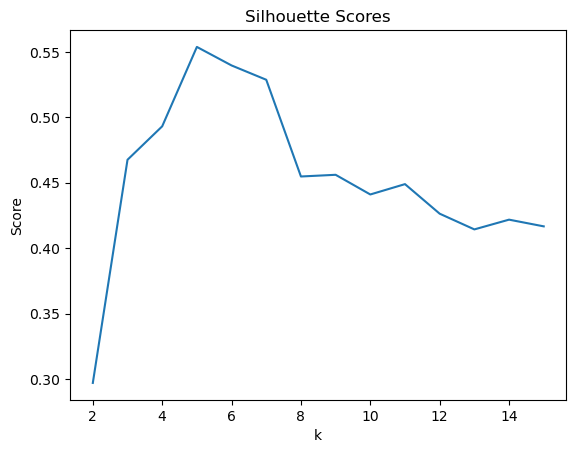

In [9]:
sil = []

#n-init means it will run 10 times with random starting point
for k in range(2, 16):
    km = KMeans(n_clusters = k , n_init = 10, random_state = 42)
    sil.append(silhouette_score(x, km.fit_predict(x)))
    
best_k = range(2, 16)[sil.index(max(sil))]

print("best k is", best_k)

plt.plot(range(2, 16), sil)
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

In [10]:
x_train, x_test = train_test_split(x, test_size=0.25, random_state=42)

E:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silhoutee 0.553931997444648 dbs 0.5725628995597086


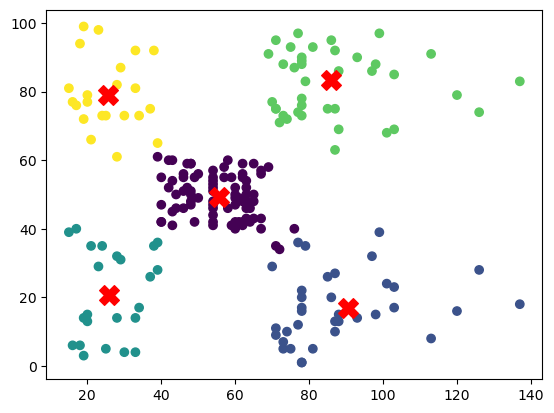

In [25]:
km = KMeans(n_clusters=best_k, n_init=10, random_state=42)
km.fit(x_train)
predicted = km.predict(x)

silscore = silhouette_score(x, predicted)
dbs = davies_bouldin_score(x, predicted)

print("silhoutee", silscore, "dbs", dbs)


plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c = predicted)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c = 'red', s = 200, marker='X')
plt.show()

Agglomerative (k= 5 ) silhouette= 0.553 , DB= 0.5782


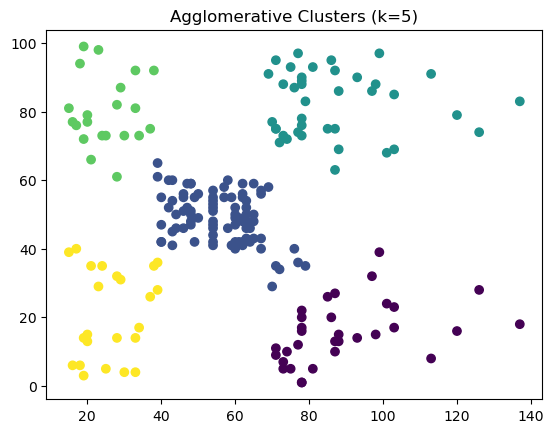

In [41]:
ac = AgglomerativeClustering(n_clusters=best_k)
predicted_ac = ac.fit_predict(x)

sil_ac = silhouette_score(x, predicted_ac)
dbs_ac = davies_bouldin_score(x, predicted_ac)

print("Agglomerative (k=", best_k, ") silhouette=", round(sil_ac, 4), ", DB=", round(dbs_ac, 4))
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c = predicted_ac)
plt.title(f'Agglomerative Clusters (k={best_k})')
plt.show()

In [47]:
scores = []

for i in range(10):
    s = x.sample(frac=0.8, random_state=42+i)
    scores.append(silhouette_score(s, km.predict(s)))
                  
print("KMeans silhouette on 80% subsamples:", [s for s in scores])
print("Mean silhouette (cv-like):", sum(scores) / len(scores))


KMeans silhouette on 80% subsamples: [0.55241404186678, 0.5539063142849083, 0.5406942362892144, 0.569048110317615, 0.5573864026654441, 0.5542520480255775, 0.5518260547130818, 0.5661507746348559, 0.5463986444919854, 0.5528767198122319]
Mean silhouette (cv-like): 0.5544953347101693
